In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor


In [ ]:
df = pd.read_csv("/content/Rent.csv")
print("Original Shape:", df.shape)

Original Shape: (4727, 19)


In [ ]:
df.head()

,BHK,Size,Floor,Area Locality,City,Bathroom,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,Rent
0,2,1100.000000,454,220,4,2,0,0,1,0,0,1,0,1,0,0,0,1,10000
1,2,967.936049,14,1525,4,1,0,0,1,0,1,0,0,1,0,0,0,1,20000
2,2,1000.000000,14,1758,4,1,0,0,1,0,1,0,0,1,0,0,0,1,17000
3,2,967.936049,10,525,4,1,0,0,1,0,0,1,0,1,0,0,0,1,10000
4,2,850.000000,10,1888,4,1,0,1,0,0,0,1,1,0,0,0,0,1,7500


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727 entries, 0 to 4726
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BHK            4727 non-null   int64  
 1   Size           4727 non-null   float64
 2   Floor          4727 non-null   int64  
 3   Area Locality  4727 non-null   int64  
 4   City           4727 non-null   int64  
 5   Bathroom       4727 non-null   int64  
 6   N_11           4727 non-null   int64  
 7   N_12           4727 non-null   int64  
 8   N_13           4727 non-null   int64  
 9   N_14           4727 non-null   int64  
 10  N_15           4727 non-null   int64  
 11  N_16           4727 non-null   int64  
 12  N_17           4727 non-null   int64  
 13  N_18           4727 non-null   int64  
 14  N_19           4727 non-null   int64  
 15  N_20           4727 non-null   int64  
 16  N_21           4727 non-null   int64  
 17  N_22           4727 non-null   int64  
 18  Rent    

In [ ]:
df.describe()

,BHK,Size,Floor,Area Locality,City,Bathroom,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,Rent
count,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000
mean,2.082082,962.158582,228.930823,1090.191876,2.454411,1.962132,0.000423,0.482124,0.517453,0.143431,0.473873,0.382695,0.174529,0.725830,0.099640,0.320711,0.000212,0.679078,33828.690501
std,0.829032,608.358826,162.343589,632.789286,1.787477,0.872806,0.020567,0.499733,0.499748,0.350549,0.499370,0.486096,0.379604,0.446142,0.299552,0.466799,0.014545,0.466880,56952.969970
min,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000
25%,2.000000,552.500000,26.000000,550.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000
50%,2.000000,850.000000,200.000000,1095.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16000.000000
75%,3.000000,1200.000000,370.000000,1629.500000,4.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,32250.000000
max,6.000000,4800.000000,478.000000,2232.000000,5.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000000.000000


In [ ]:
df.isnull().sum()

,0
BHK,0
Size,0
Floor,0
Area Locality,0
City,0
Bathroom,0
N_11,0
N_12,0
N_13,0
N_14,0


In [ ]:
X = df.drop('Rent', axis=1)
y = df['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3781, 18)
X_test shape: (946, 18)
y_train shape: (3781,)
y_test shape: (946,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (3781, 18)
X_test_scaled shape: (946, 18)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:

history = model.fit(
    X_train_scaled, y_train,
    epochs=230, batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/230
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3311217408.0000 - mean_absolute_error: 29647.4785 - val_loss: 1385838336.0000 - val_mean_absolute_error: 19433.6094
Epoch 2/230
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2000507008.0000 - mean_absolute_error: 19840.8750 - val_loss: 1188594432.0000 - val_mean_absolute_error: 16726.6758
Epoch 3/230
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2104925312.0000 - mean_absolute_error: 17706.9922 - val_loss: 1129992704.0000 - val_mean_absolute_error: 16041.5312
Epoch 4/230
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1257913472.0000 - mean_absolute_error: 15595.0986 - val_loss: 1095651968.0000 - val_mean_absolute_error: 16179.1152
Epoch 5/230
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1523495424.0000 - mean_absolute_error: 15864.8330 - val_loss: 1096745088.0000 - val_mean_absolute_error: 16640.8438
Epoch 6/230
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1370688256.0000 - mean_absolute_error: 15963.6562 - va

In [ ]:

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 596931136.00
R-squared: 0.79


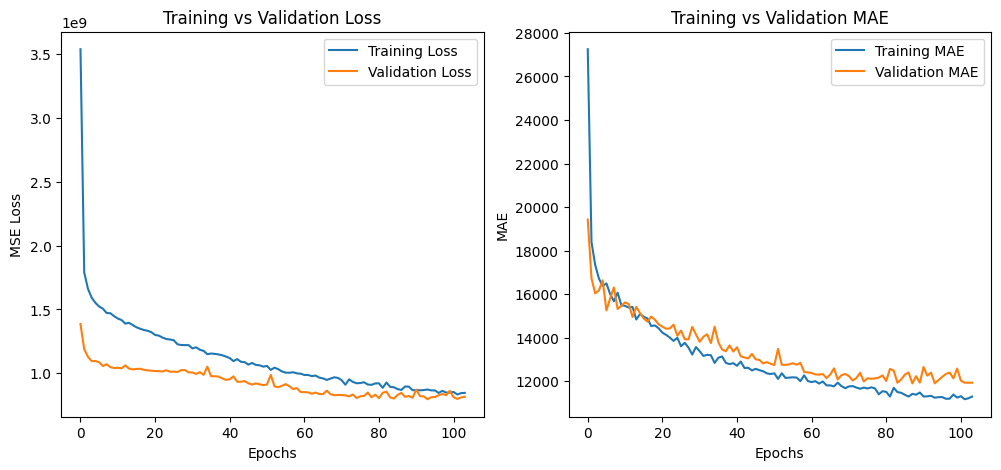

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Training & Validation MAE
plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()

plt.show()
